In [5]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read in file
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
train_original.sample(10)
total = [train_original,test_original]

In [7]:
#Retrive the salutation from 'Name' column
for dataset in total:
    dataset['Salutation'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

In [8]:
pd.crosstab(train_original['Salutation'], train_original['Sex'])

Sex,female,male
Salutation,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
pd.crosstab(test_original['Salutation'], test_original['Sex'])

Sex,female,male
Salutation,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [10]:
for dataset in total:
    dataset['Salutation'] = dataset['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Salutation'] = dataset['Salutation'].replace('Mlle', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Ms', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Mme', 'Mrs')
    dataset['Salutation'] = pd.factorize(dataset['Salutation'])[0]
    


In [11]:
pd.crosstab(train_original['Salutation'], train_original['Sex'])

Sex,female,male
Salutation,,
0,0,517
1,126,0
2,185,0
3,0,40
4,3,20


In [12]:
pd.crosstab(test_original['Salutation'], test_original['Sex'])

Sex,female,male
Salutation,,
0,0,240
1,72,0
2,79,0
3,0,21
4,1,5


In [13]:
#clean unused variable
train=train_original.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test=test_original.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
total = [train,test]

train.shape, test.shape

((891, 9), (418, 8))

In [14]:
#Detect the missing data in 'train' dataset
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Salutation      0
dtype: int64

In [15]:
## Create function to replace missing data with the median value
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Salutation"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

train = fill_missing_age(train)

In [16]:
## Embarked missing cases 
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
61,1,1,female,38.0,0,0,80.0,NaN,2
829,1,1,female,62.0,0,0,80.0,NaN,1


In [17]:
train["Embarked"] = train["Embarked"].fillna('C')

In [18]:
test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Salutation     0
dtype: int64

In [19]:
test[test['Age'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
10,3,male,NaN,0,0,7.8958,S,0
22,1,female,NaN,0,0,31.6833,S,1
29,3,male,NaN,2,0,21.6792,C,0
33,3,female,NaN,1,2,23.4500,S,1
36,3,female,NaN,0,0,8.0500,S,2


In [20]:
#apply the missing age method to test dataset
test = fill_missing_age(test)

In [21]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
152,3,male,60.5,0,0,NaN,S,0


In [22]:
#filling the missing 'Fare' data with the  median
def fill_missing_fare(dataset):
    median_fare=dataset[(dataset["Pclass"]==3) & (dataset["Embarked"]=="S")]["Fare"].median()
    dataset["Fare"]=dataset["Fare"].fillna(median_fare)
    return dataset

test = fill_missing_fare(test)

In [23]:
## Re-Check for missing data
train.isnull().any()

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Salutation    False
dtype: bool

In [24]:
## Re-Check for missing data
test.isnull().any()

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Salutation    False
dtype: bool

In [25]:
for dataset in total:
    dataset.loc[dataset["Age"] <= 9, "Age"] = 0
    dataset.loc[(dataset["Age"] > 9) & (dataset["Age"] <= 19), "Age"] = 1
    dataset.loc[(dataset["Age"] > 19) & (dataset["Age"] <= 29), "Age"] = 2
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[dataset["Age"] > 39, "Age"] = 4

In [26]:
pd.qcut(train["Fare"], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

In [27]:
for dataset in total:
    dataset.loc[dataset["Fare"] <= 7.75, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.75) & (dataset["Fare"] <= 7.91), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 9.841), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 9.841) & (dataset["Fare"] <= 14.454), "Fare"] = 3   
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 24.479), "Fare"] = 4
    dataset.loc[(dataset["Fare"] >24.479) & (dataset["Fare"] <= 31), "Fare"] = 5   
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 69.487), "Fare"] = 6
    dataset.loc[dataset["Fare"] > 69.487, "Fare"] = 7

In [28]:
for dataset in total:
    dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
    dataset['Embarked']= pd.factorize(dataset['Embarked'])[0]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,0,3,0,2.0,1,0,0.0,0,0
1,1,1,1,3.0,1,0,7.0,1,1
2,1,3,1,2.0,0,0,2.0,0,2
3,1,1,1,3.0,1,0,6.0,0,1
4,0,3,0,3.0,0,0,2.0,0,0


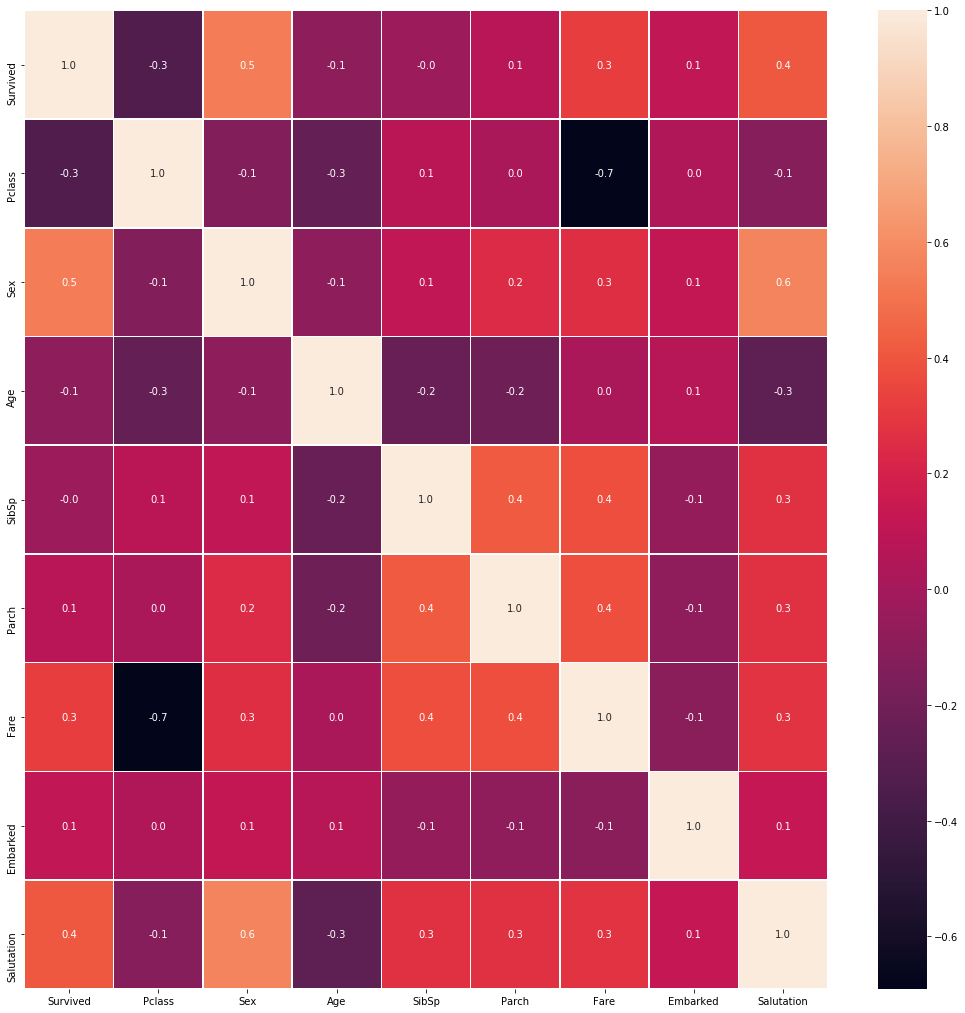

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [30]:
x = train.drop("Survived", axis=1)
y = train["Survived"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)


In [34]:
 MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
     #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [36]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,AdaBoostClassifier,0.8383,0.7937,0.818182,0.663158,0.776891
6,LogisticRegressionCV,0.8129,0.7937,0.810127,0.673684,0.778248
16,LinearSVC,0.8054,0.7937,0.802469,0.684211,0.779605
15,NuSVC,0.8353,0.7937,0.818182,0.663158,0.776891
2,ExtraTreesClassifier,0.9162,0.7892,0.833333,0.631579,0.768914
8,RidgeClassifierCV,0.8039,0.7892,0.785714,0.694737,0.777056
4,RandomForestClassifier,0.9162,0.7848,0.821918,0.631579,0.765008
14,SVC,0.8413,0.7848,0.813333,0.642105,0.766365
12,GaussianNB,0.8129,0.7803,0.761364,0.705263,0.770600
3,GradientBoostingClassifier,0.8743,0.7758,0.816901,0.610526,0.754482


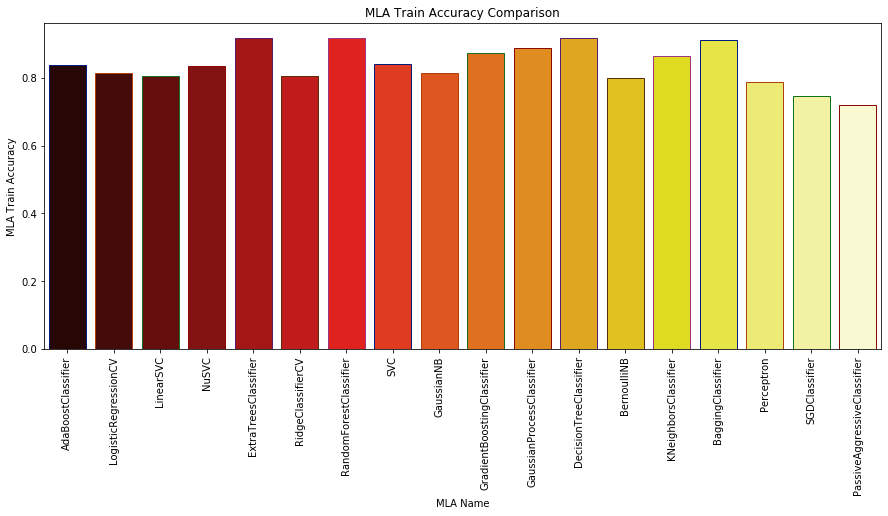

In [37]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

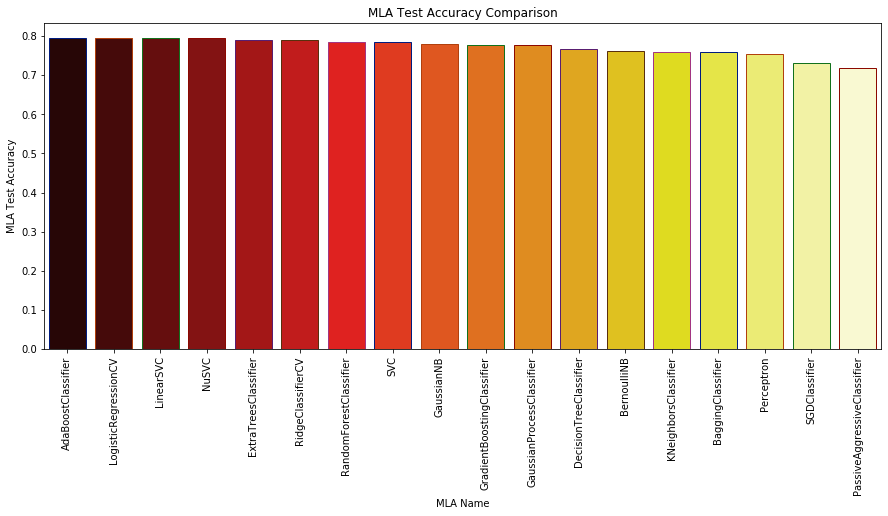

In [38]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

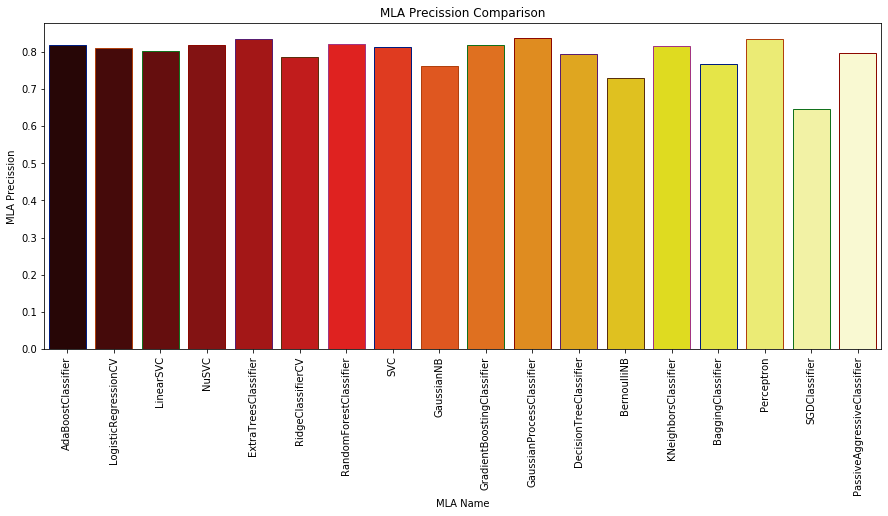

In [39]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

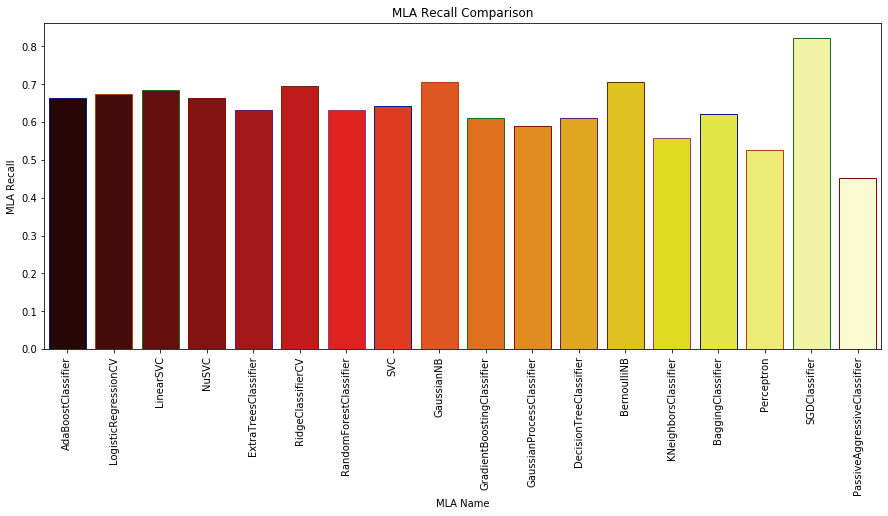

In [40]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

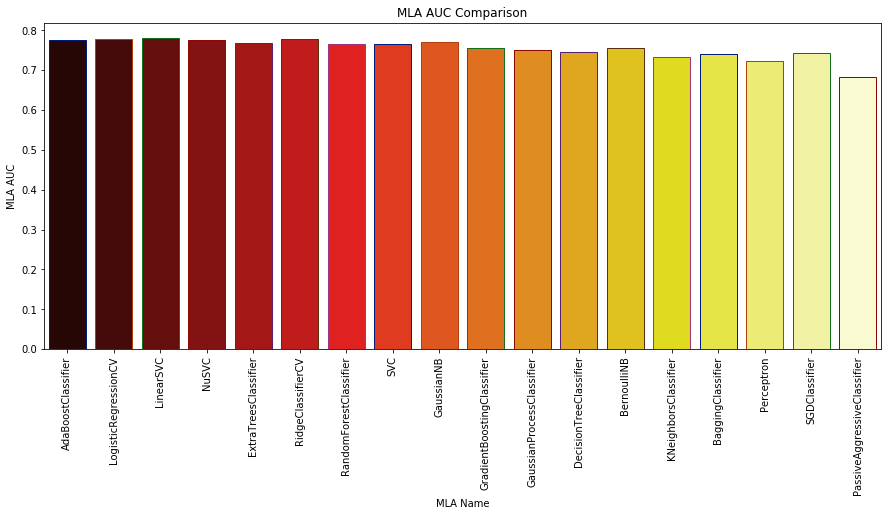

In [41]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

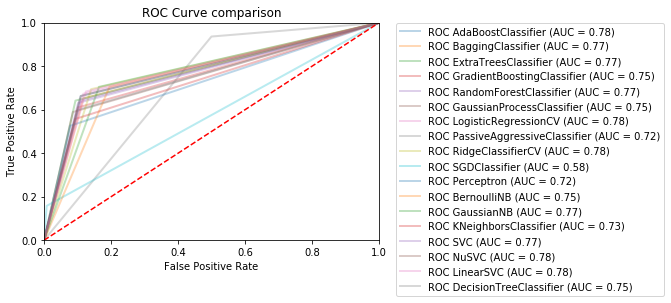

In [43]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [44]:
tunealg = ensemble.ExtraTreesClassifier() #Select the algorithm to be tuned
tunealg.fit(x_train, y_train)

print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
print('-'*10)

BEFORE tuning Parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE tuning Training w/bin set score: 0.92
BEFORE tuning Test w/bin set score: 0.80
----------


In [46]:
#tune parameters
param_grid = {#'bootstrap': [True, False],
              'class_weight': ['balanced' , None],
              #'max_depth': [1, 2,3,4, None],
              #'max_features': ['log2', 'auto'],
              #'max_leaf_nodes': [0,1,2,3,4, None],
              #'min_impurity_decrease': [True, False, None],
              #'min_impurity_split': [True, False],
              #'min_samples_leaf': [1, 2,3,4,5],
              #'min_samples_split': [1,2,3,4,5],
              #'min_weight_fraction_leaf': [0.0,1.0,2.0,3.0,4.0,5.0], 
              #'n_estimators': [10,15,25,35,45], 
              'n_jobs':  [1,2,3,4,5], 
              #'oob_score': [True, False], 
              'random_state': [0,1, 2,3,4, None], 
              #'verbose': [0,1, 2,3,4, 5], 
              'warm_start': [True, False]
             }
# So, what this GridSearchCV function do is finding the best combination of parameters value that is set above.
tune_model = model_selection.GridSearchCV(linear_model.PassiveAggressiveClassifier(), param_grid=param_grid, scoring = 'roc_auc')
tune_model.fit (x_train, y_train)

Y_pred = tune_model.predict(X_test)
tune_model.score(X_train,Y_train)
acc_tune = round(tune_model.score(X_train, Y_train) * 100, 2)

print('AFTER tuning Parameters: ', tune_model.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("AFTER tuning Test w/bin set score: {:.2f}". format(tune_model.score(x_test, y_test)))
print('-'*10)


NameError: name 'X_test' is not defined

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred})

submission.to_csv("y.csv",index=False)